Web page used for this exercise: http://quotes.toscrape.com

In [2]:
import requests
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from selenium import webdriver
from selenium.webdriver.firefox.options import Options
from selenium.webdriver import Firefox
from selenium.webdriver.support.events import EventFiringWebDriver, AbstractEventListener
import pandas as pd
import csv
from selenium.webdriver.common.keys import Keys  
from selenium.webdriver.common.by import By
from IPython.display import Image
import logging

In [3]:
#Extract the HTML content of the page:
url = "http://quotes.toscrape.com/"
page = requests.get(url)
soup = BeautifulSoup(page.content, "html.parser")

In [6]:
#Display the page title:
soup.title

<title>Quotes to Scrape</title>

To display the page using the BeautifulSoup library, the code is used:
print(soup.prettify())

In this exercise I chose to leave it as markdown to make the exercise more readable.
In the following image we can see what happens if we execute the code

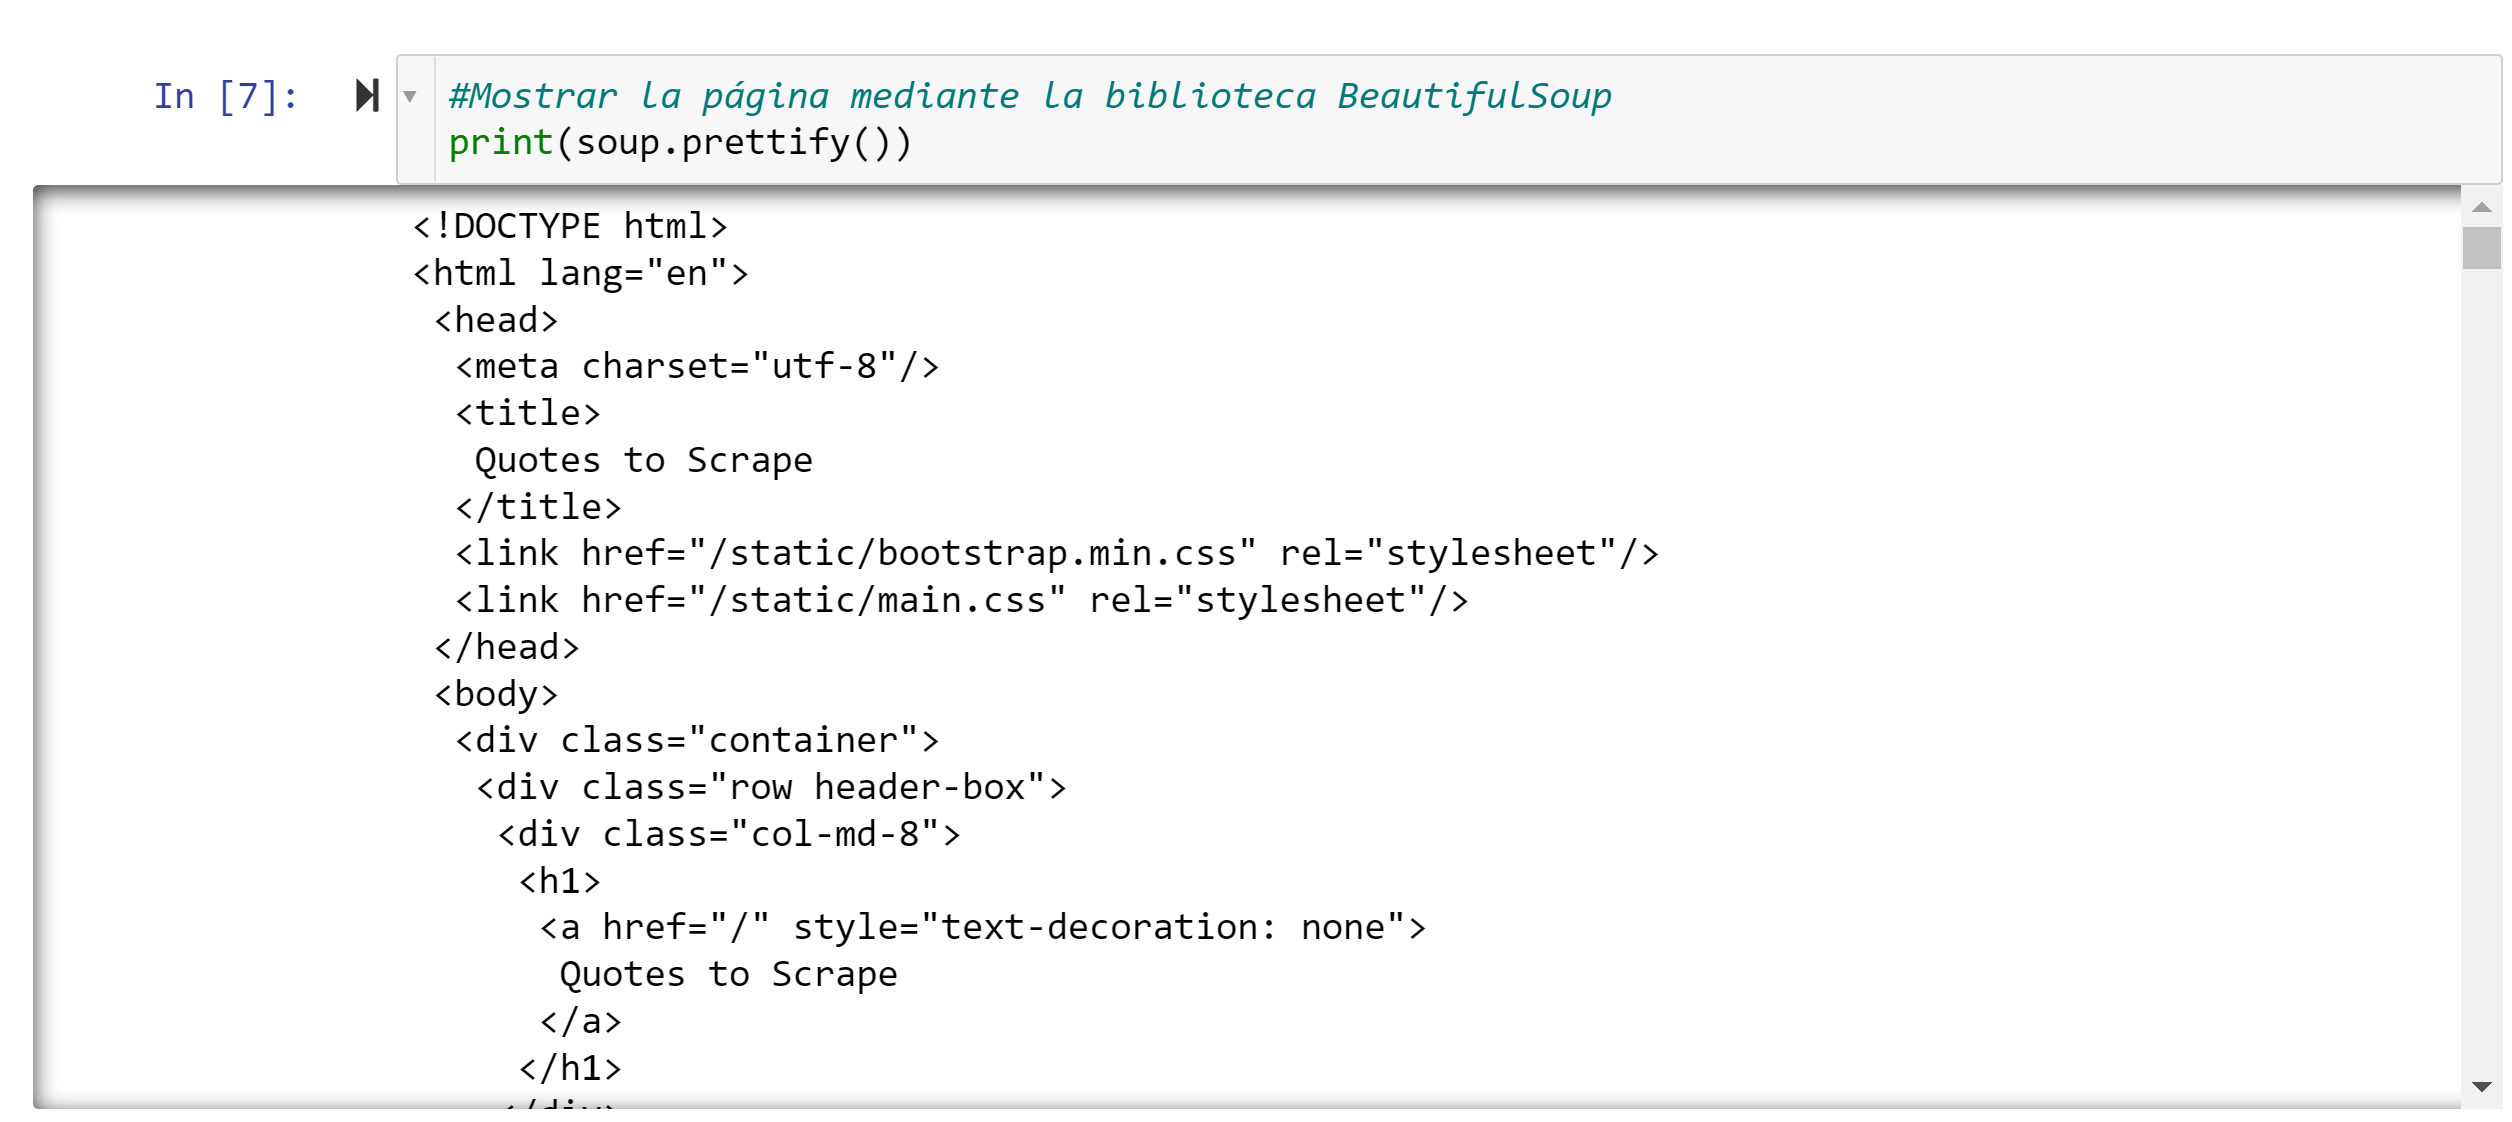

In [8]:
Image(filename='Print_html.png') 

In [9]:
#Retrieve all links (<a> tag) from the HTML.
enlaces = soup.find_all('a')
for enlace in enlaces:
    print(enlace)

<a href="/" style="text-decoration: none">Quotes to Scrape</a>
<a href="/login">Login</a>
<a href="/author/Albert-Einstein">(about)</a>
<a class="tag" href="/tag/change/page/1/">change</a>
<a class="tag" href="/tag/deep-thoughts/page/1/">deep-thoughts</a>
<a class="tag" href="/tag/thinking/page/1/">thinking</a>
<a class="tag" href="/tag/world/page/1/">world</a>
<a href="/author/J-K-Rowling">(about)</a>
<a class="tag" href="/tag/abilities/page/1/">abilities</a>
<a class="tag" href="/tag/choices/page/1/">choices</a>
<a href="/author/Albert-Einstein">(about)</a>
<a class="tag" href="/tag/inspirational/page/1/">inspirational</a>
<a class="tag" href="/tag/life/page/1/">life</a>
<a class="tag" href="/tag/live/page/1/">live</a>
<a class="tag" href="/tag/miracle/page/1/">miracle</a>
<a class="tag" href="/tag/miracles/page/1/">miracles</a>
<a href="/author/Jane-Austen">(about)</a>
<a class="tag" href="/tag/aliteracy/page/1/">aliteracy</a>
<a class="tag" href="/tag/books/page/1/">books</a>
<a cl

In [11]:
# Find all hyperlinks that have the string "about".
links = []
for link in soup.find_all('a', string='(about)'):
    links.append(link.get('href'))   
links

['/author/Albert-Einstein',
 '/author/J-K-Rowling',
 '/author/Albert-Einstein',
 '/author/Jane-Austen',
 '/author/Marilyn-Monroe',
 '/author/Albert-Einstein',
 '/author/Andre-Gide',
 '/author/Thomas-A-Edison',
 '/author/Eleanor-Roosevelt',
 '/author/Steve-Martin']

In [12]:
#Link to access the url with index 0:
new_url = url+links[0]
new_url

'http://quotes.toscrape.com//author/Albert-Einstein'

In [13]:
#Find all tags that have the text class
soup.find_all(class_="text")

[<span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>,
 <span class="text" itemprop="text">“It is our choices, Harry, that show what we truly are, far more than our abilities.”</span>,
 <span class="text" itemprop="text">“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”</span>,
 <span class="text" itemprop="text">“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”</span>,
 <span class="text" itemprop="text">“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”</span>,
 <span class="text" itemprop="text">“Try not to become a man of success. Rather become a man of value.”</span>,
 <span class="text" itemprop="text">“It is better to be hated for what you are than to be loved for what you are not.

In [14]:
#Find all divs that have the class "tags". 
links_divs = soup.find_all('div', class_="tags")
print(links_divs)

[<div class="tags">
            Tags:
            <meta class="keywords" content="change,deep-thoughts,thinking,world" itemprop="keywords"/>
<a class="tag" href="/tag/change/page/1/">change</a>
<a class="tag" href="/tag/deep-thoughts/page/1/">deep-thoughts</a>
<a class="tag" href="/tag/thinking/page/1/">thinking</a>
<a class="tag" href="/tag/world/page/1/">world</a>
</div>, <div class="tags">
            Tags:
            <meta class="keywords" content="abilities,choices" itemprop="keywords"/>
<a class="tag" href="/tag/abilities/page/1/">abilities</a>
<a class="tag" href="/tag/choices/page/1/">choices</a>
</div>, <div class="tags">
            Tags:
            <meta class="keywords" content="inspirational,life,live,miracle,miracles" itemprop="keywords"/>
<a class="tag" href="/tag/inspirational/page/1/">inspirational</a>
<a class="tag" href="/tag/life/page/1/">life</a>
<a class="tag" href="/tag/live/page/1/">live</a>
<a class="tag" href="/tag/miracle/page/1/">miracle</a>
<a class="tag"

In [15]:
#Example of how to extract a tag. 
soup = BeautifulSoup(page.content, 'html.parser')
soup.find_all('p')

[<p>
 <a href="/login">Login</a>
 </p>,
 <p class="text-muted">
                 Quotes by: <a href="https://www.goodreads.com/quotes">GoodReads.com</a>
 </p>,
 <p class="copyright">
                 Made with <span class="sh-red">❤</span> by <a href="https://scrapinghub.com">Scrapinghub</a>
 </p>]

In [14]:
#Example of how to extract a tag
soup.find_all('p')[2].get_text()

'\n                Made with ❤ by Scrapinghub\n'

## Recommended web pages

https://realpython.com/beautiful-soup-web-scraper-python/

https://j2logo.com/python/web-scraping-con-python-guia-inicio-beautifulsoup/

https://www.dataquest.io/blog/web-scraping-python-using-beautiful-soup/

